<a href="https://colab.research.google.com/github/hechen2020/19ma573HuixinChen/blob/master/src/hw_ftcs_stability_heat_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Para**
- $\alpha = 1$, $a = 0$, $b=1$;
- $f(x) = sin(\pi x)$
- $g(t)=h(t)=0$
- exact solution:

$$u(x,t) = e^{-\pi^2 t}sin(\pi x)$$

In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Implementation - 01**

We first choose $\rho = 0.4$ other parameters given below.

In [0]:
def fu(x,t):
  u = np.exp(-np.pi**2 * t) * np.sin(np.pi*x)
  return u

In [0]:
def ftcs(a,b,nt,dx,dt,rho):
  nx = int((b-a)/dx)
  u = np.zeros((nt,nx))
  
  for x in range(0,nx):
    u[0][x] = fu(a+x*dx,0)
    
  for t in range(0,nt-1):
    for x in range(1,nx-1):
      u[t+1][x] = rho*(u[t][x-1]) + (1-2*rho)*(u[t][x]) + rho*(u[t][x+1])
      
      
  return u

In [0]:
al = 1 #alpha
dx = .2 #space mesh size
rho = .4 #conditinal number, to be less than .5 for the stability
dt = rho*(dx**2)/al #time step size

In [0]:
sol = ftcs(-1,1.2,200,dx,dt,rho)
#print(sol)

In [0]:
def error_fcn(a,b,nt,dx,dt,sol):
  nx = int((b-a)/dx)
  e = np.zeros((nt,nx))
  
  for t in range(nt):
    for x in range(nx):
      e[t][x] = np.abs(sol[t][x]-fu(a+x*dx,t*dt))
  return e

**find $L^\infty$ error between exact solution and ftcs solution**

In [7]:
err = error_fcn(-1,1.2,200,dx,dt,sol)
#print(err)
print(np.max(err))

0.017046800494472714


**plot three error curves in one figure corresponding to $t = 1.95, 1.97, 1.98$**

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]


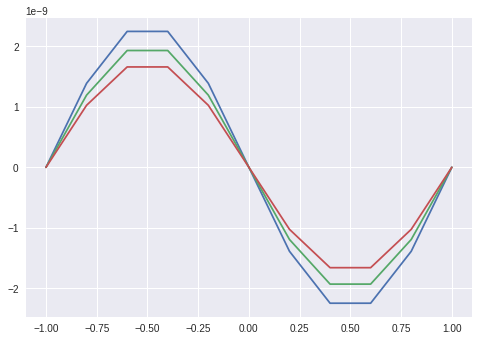

In [8]:
xl = np.arange(-1.,1.2,0.2)
print(xl)
#t=1.952 (for rounding)
exact1 = np.zeros(11)
err1 = np.zeros(11)
for x in range(len(xl)):
  exact1[x] = fu(xl[x],1.952)
  err1[x] = sol[int(1.952/dt)][x] - exact1[x]
#t=1.968 (for rounding)
exact2 = np.zeros(11)
err2 = np.zeros(11)
for x in range(len(xl)):
  exact2[x] = fu(xl[x],1.968)
  err2[x] = sol[int(1.968/dt)][x] - exact2[x]
#t=1.984 (for rounding)
exact3 = np.zeros(11)
err3 = np.zeros(11)
for x in range(len(xl)):
  exact3[x] = fu(xl[x],1.984)
  err3[x] = sol[int(1.984/dt)][x] - exact3[x]
plt.plot(xl,err1)
plt.plot(xl,err2)
plt.plot(xl,err3)

**plot a surface of eact solution**

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

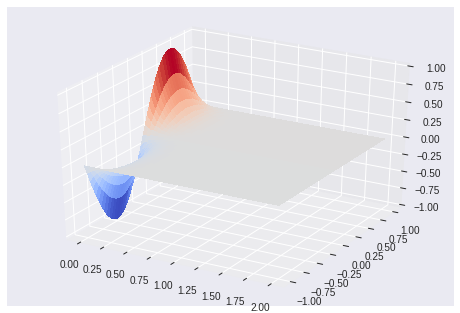

In [10]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
X = np.arange(-1,1,0.005)
T = np.arange(0,2,0.005)
X,T = np.meshgrid(X,T)
U = fu(X,T)
surf = ax.plot_surface(T,X,U,cmap = cm.coolwarm,linewidth = 0, antialiased = False)
plt.show()

**Implementation - 02**

We now change $\rho = 1$ with others unchanged

In [0]:
al = 1 #alpha
dx = .2 #space mesh size
rho = 1 #conditinal number changed to 1
dt = rho*(dx**2)/al #time step size

In [0]:
sol = ftcs(-1,1.2,200,dx,dt,rho)
#print(sol)

**find $L^\infty$ error between exact solution and ftcs solution**

In [13]:
err = error_fcn(-1,1.2,200,dx,dt,sol)
print(np.max(err))

8.968780821046568e+75


**plot three error curves in one figure corresponding to $t = 1.88, 1.92, 1.96$**

[-1.00000000e+00 -8.00000000e-01 -6.00000000e-01 -4.00000000e-01
 -2.00000000e-01 -2.22044605e-16  2.00000000e-01  4.00000000e-01
  6.00000000e-01  8.00000000e-01  1.00000000e+00]


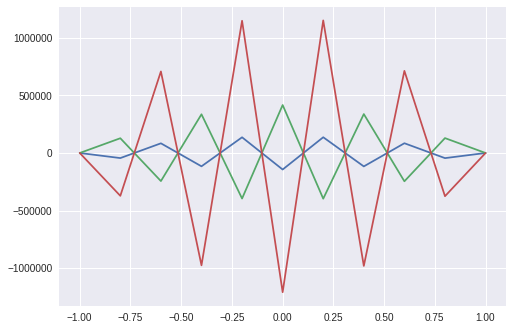

In [14]:
xl = np.arange(-1.,1.2,0.2)
print(xl)
#t=1.88
exact1 = np.zeros(11)
err1 = np.zeros(11)
for x in range(len(xl)):
  exact1[x] = fu(xl[x],1.88)
  err1[x] = sol[int(1.88/dt)][x] - exact1[x]
#t=1.92
exact2 = np.zeros(11)
err2 = np.zeros(11)
for x in range(len(xl)):
  exact2[x] = fu(xl[x],1.92)
  err2[x] = sol[int(1.92/dt)][x] - exact2[x]
#t=1.96
exact3 = np.zeros(11)
err3 = np.zeros(11)
for x in range(len(xl)):
  exact3[x] = fu(xl[x],1.96)
  err3[x] = sol[int(1.96/dt)][x] - exact3[x]
plt.plot(xl,err1)
plt.plot(xl,err2)
plt.plot(xl,err3)